# Reducing Commercial Aviation Fatalities
##### by: Rehan Daya, Troy Walton, Yiwei Zhou, Emmanuella Eguche

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
%pylab inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


## Assumption on Data Gathered

##### A= Train is collected in a non-flight environment.
##### B= Test is collected in a flight simulator

##### The goal is to predict the probability of each state for each time in the test set. We assume that the non-flight environment is equivalent to a flight simulator. Given the purpose of this experiement is likely to see the validity of the predictions in real life, and not only the flight simulator, we must also assume that A and B are equal to a real-flight environment (C).

##### As such A=B=C.

In [2]:
test = pd.read_csv('test.csv') #This data is created from pilots in a flight simulator
train = pd.read_csv('train.csv') #This data is created from pilots not in a flight simulator

## Data Exploration

In [3]:
test.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,-187.080002,-33.183498,-4.220780,8.178160,33.160301,33.812500,21.744699,16.293800,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,-5.145290,6.395940,33.420101,-295.013000,8.373170,29.636400,16.223000,850.288025,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,-107.236000,12.845200,1.215280,13.317000,44.435101,37.585800,29.073000,22.316099,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,-8.021180,7.427430,27.345699,-310.165009,5.389070,27.733999,7.217500,816.679016,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,37.007900,-50.334202,-11.676400,-1.143860,-17.600500,34.075600,22.912399,19.033800,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [4]:
train.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.92134,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.46991,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.57886,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.64310,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.50030,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   crew        int64  
 1   experiment  object 
 2   time        float64
 3   seat        int64  
 4   eeg_fp1     float64
 5   eeg_f7      float64
 6   eeg_f8      float64
 7   eeg_t4      float64
 8   eeg_t6      float64
 9   eeg_t5      float64
 10  eeg_t3      float64
 11  eeg_fp2     float64
 12  eeg_o1      float64
 13  eeg_p3      float64
 14  eeg_pz      float64
 15  eeg_f3      float64
 16  eeg_fz      float64
 17  eeg_f4      float64
 18  eeg_c4      float64
 19  eeg_p4      float64
 20  eeg_poz     float64
 21  eeg_c3      float64
 22  eeg_cz      float64
 23  eeg_o2      float64
 24  ecg         float64
 25  r           float64
 26  gsr         float64
 27  event       object 
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965143 entries, 0 to 17965142
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   crew        int64  
 2   experiment  object 
 3   time        float64
 4   seat        int64  
 5   eeg_fp1     float64
 6   eeg_f7      float64
 7   eeg_f8      float64
 8   eeg_t4      float64
 9   eeg_t6      float64
 10  eeg_t5      float64
 11  eeg_t3      float64
 12  eeg_fp2     float64
 13  eeg_o1      float64
 14  eeg_p3      float64
 15  eeg_pz      float64
 16  eeg_f3      float64
 17  eeg_fz      float64
 18  eeg_f4      float64
 19  eeg_c4      float64
 20  eeg_p4      float64
 21  eeg_poz     float64
 22  eeg_c3      float64
 23  eeg_cz      float64
 24  eeg_o2      float64
 25  ecg         float64
 26  r           float64
 27  gsr         float64
dtypes: float64(24), int64(3), object(1)
memory usage: 3.7+ GB


A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

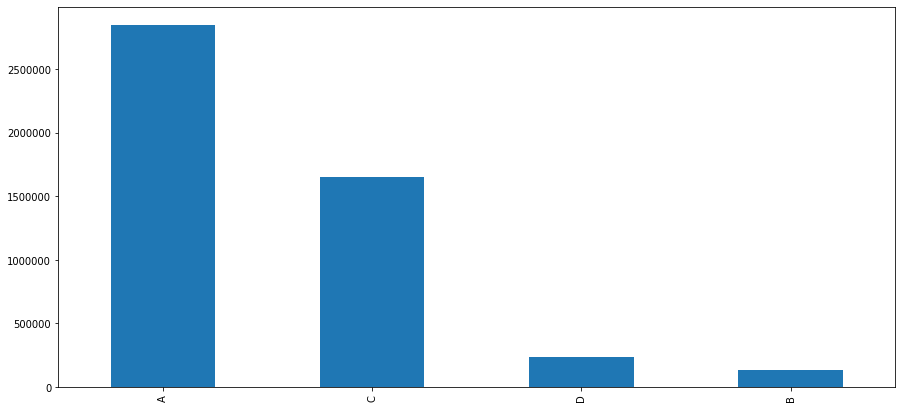

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
train['event'].value_counts().plot.bar(ax=ax)
train['event'].value_counts()

DA    1658393
CA    1658376
SS    1550652
Name: experiment, dtype: int64

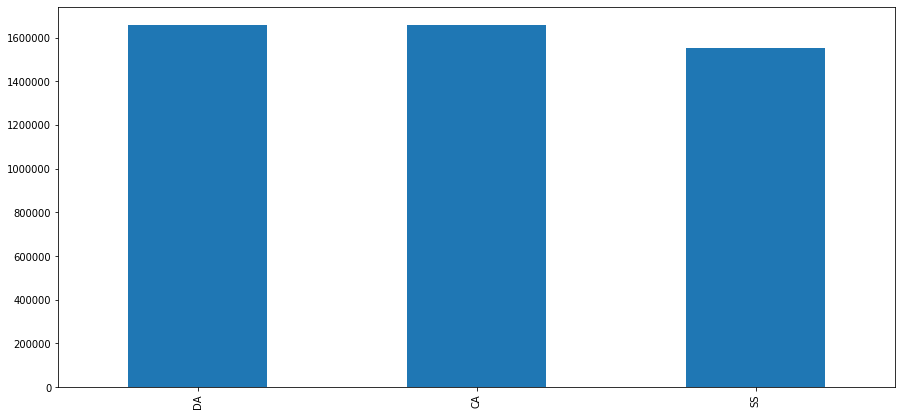

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
train['experiment'].value_counts().plot.bar(ax=ax)
train['experiment'].value_counts()

event             A       B        C       D
experiment                                  
CA             5690       0  1652686       0
DA          1423064       0        0  235329
SS          1420055  130597        0       0


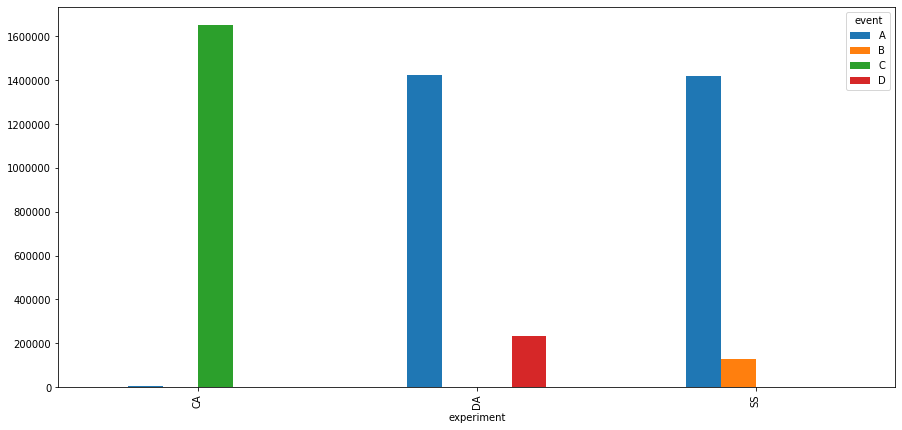

In [9]:
#We can see that only some events are realized in each experiment.
fig, ax = plt.subplots(figsize=(15,7))
train_x=pd.crosstab(train.experiment, train.event)
print(train_x)
train_x.plot.bar(ax=ax)

0    2433939
1    2433482
Name: seat, dtype: int64

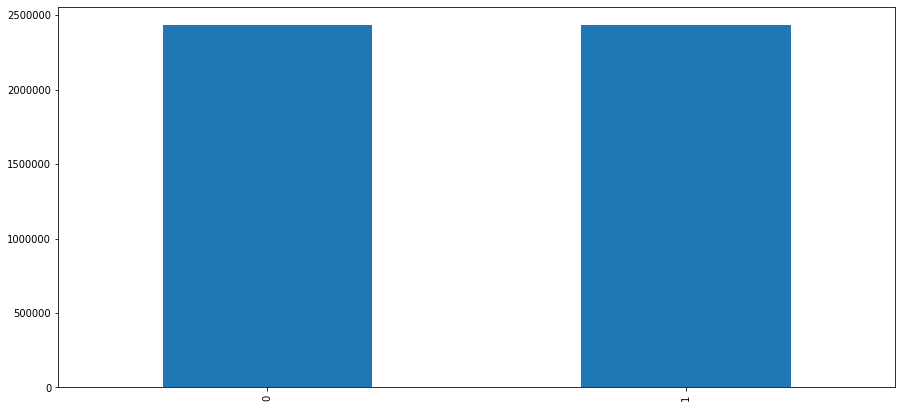

In [10]:
#Roughly the same number of observations are made in each seat
fig, ax = plt.subplots(figsize=(15,7))
train['seat'].value_counts().plot.bar(ax=ax)
train['seat'].value_counts()

seat             0       1
experiment                
CA          829297  829079
DA          829304  829089
SS          775338  775314


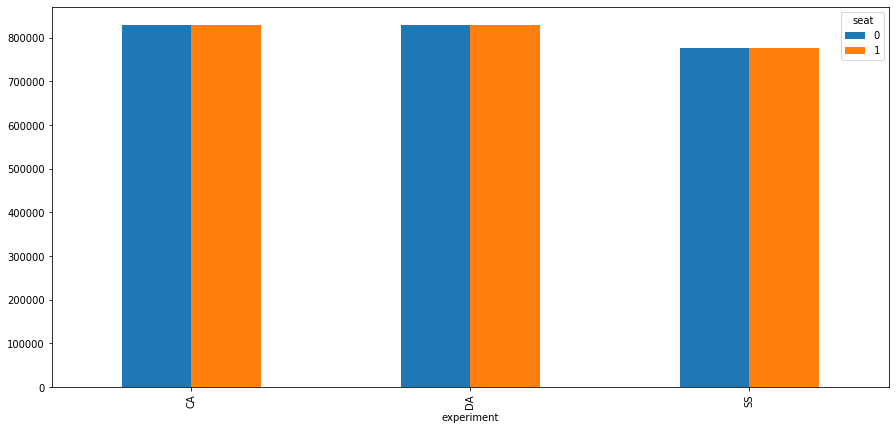

In [11]:
#We can see that roughly an equal amount of obervations in seat 1 and seat 0 are used in each experiment.
fig, ax = plt.subplots(figsize=(15,7))
train_x=pd.crosstab(train.experiment, train.seat)
print(train_x)
train_x.plot.bar(ax=ax)

6     552958
4     552881
2     552868
5     552815
3     552795
7     552769
13    552724
8     549959
1     447652
Name: crew, dtype: int64

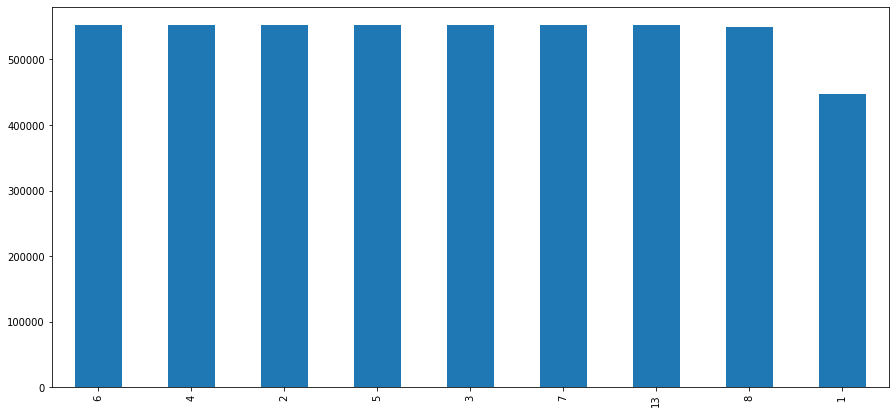

In [12]:
#Oddly, there are 9 crews, but they are not named properly. This indicates, that we are using a sample of the population dataset
#that Booze Allen Hamilton has, where they have 13 or more crews. Additionally crew #1 has ~20% less observations.
fig, ax = plt.subplots(figsize=(15,7))
train['crew'].value_counts().plot.bar(ax=ax)
train['crew'].value_counts()

experiment      CA      DA      SS
crew                              
1           184299  184207   79146
2           184232  184293  184343
3           184232  184274  184289
4           184337  184301  184243
5           184252  184292  184271
6           184254  184389  184315
7           184238  184235  184296
8           184244  184195  181520
13          184288  184207  184229


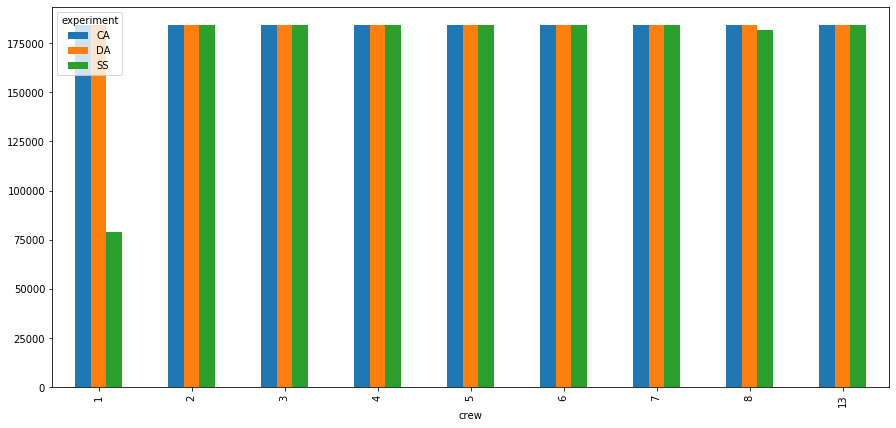

In [13]:
#We can see that crew 1 is lacking in experiment SS which may cause some bias.
fig, ax = plt.subplots(figsize=(15,7))
train_x=pd.crosstab(train.crew, train.experiment)
print(train_x)
train_x.plot.bar(ax=ax)

In [14]:
CA=train[train['experiment']=='CA']
DA=train[train['experiment']=='DA']
SS=train[train['experiment']=='SS']

### We can understand when the experiments display their unique excersises, to cause an event to occur.

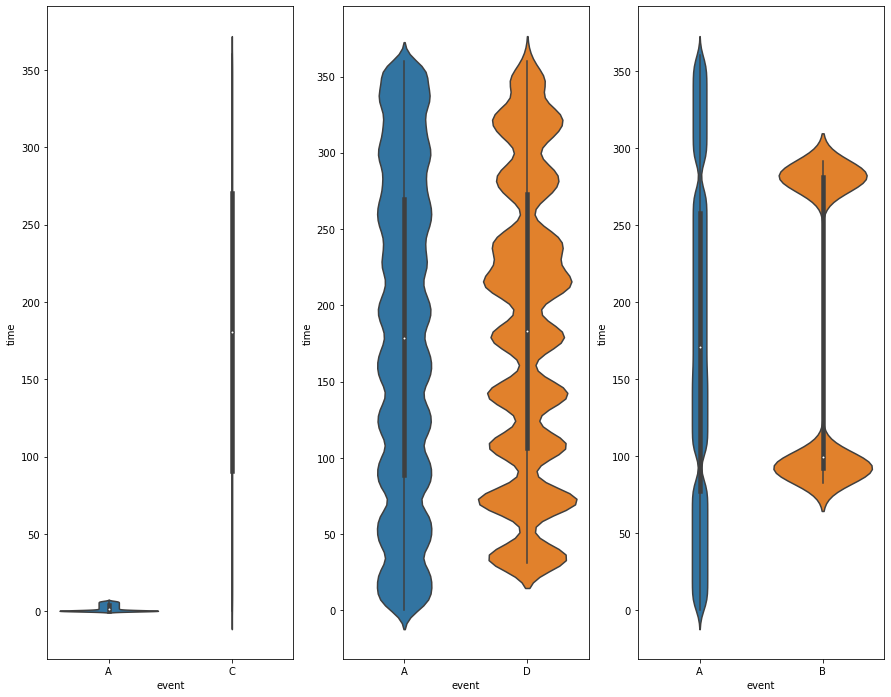

In [15]:
#Shows when events occur during each experiment
f, axes = plt.subplots(1, 3, figsize=(15,12))
sns.violinplot(x='event', y='time', data=CA, ax=axes[0], title="CA")
sns.violinplot(x='event', y='time', data=DA, ax=axes[1], title="DA")
sns.violinplot(x='event', y='time', data=SS, ax=axes[2], title="SS")
plt.show()


In [16]:
x=((CA['event']=='A').sum())/(len(CA))*100
print("In experiment CA, baseline event A occurs for",x,'percent of the time and channelized attention event C occurs for', 100-x,'percent of the time')

In experiment CA, baseline event A occurs for 0.34310675021828585 percent of the time and channelized attention event C occurs for 99.65689324978172 percent of the time


In [17]:
x=((DA['event']=='A').sum())/(len(DA))*100
print("In experiment DA, baseline event A occurs for",x,'percent of the time and diverted attention event D occurs for', 100-x,'percent of the time')

In experiment DA, baseline event A occurs for 85.80981709401813 percent of the time and diverted attention event D occurs for 14.190182905981871 percent of the time


In [18]:
x=((SS['event']=='A').sum())/(len(SS))*100
print("In experiment SS, baseline event A occurs for",x,'percent of the time and startled event B occurs for', 100-x,'percent of the time')

In experiment SS, baseline event A occurs for 91.57792979985193 percent of the time and startled event B occurs for 8.42207020014807 percent of the time


### Looking at the stats here, we see that ____ has a larger standard deviation than the rest, indicating a higher distraction. This is more relevant than looking at the sum of eeg ratings through the entire experiment, since the violin plot shows that there are more instances of event D than B and C.

In [19]:
x=train.groupby(['experiment', 'event','crew','seat'])[["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2",'ecg','r','gsr']].agg(['mean']).round(3)
x

eeg_fp1  eeg_f7  eeg_f8  eeg_t4  eeg_t6  eeg_t5  eeg_t3 eeg_fp2  eeg_o1  eeg_p3   eeg_pz  eeg_f3  eeg_fz  eeg_f4  eeg_c4  eeg_p4 eeg_poz  eeg_c3  eeg_cz  eeg_o2        ecg        r       gsr
                              mean    mean    mean    mean    mean    mean    mean    mean    mean    mean     mean    mean    mean    mean    mean    mean    mean    mean    mean    mean       mean     mean      mean
experiment event crew seat                                                                                                                                                                                               
CA         A     1    0     -1.709  -0.282  -0.448   0.383   0.139   0.037  -0.252  -3.857   0.070   0.397    0.523  -0.171  -0.817   0.463   0.580  -0.244   0.689  -0.040  -0.223  -0.357 -18261.913  664.994   826.865
                      1     14.815   8.348  10.280   6.082   6.814   6.118   6.817  14.707   6.127   6.263  -23.476   7.554   2.527   8.892   7.144   6.878   6.588   7.292   6.988   6.190  -4396.873  817.595   390.149
                 2    0      2.781   3.045   0.143   2.541   1.173   1.561   3.871   3.744  -0.014   2.449    1.717  10.922   1.991   4.847   1.896   1.382   1.927   3.865   3.491  -0.313  -5027.553  738.194  1190.456
                      1     12.532  -1.312  11.039   5.627  -0.083  -0.004  -2.275  16.455  -1.584  -0.388   -0.537   0.929   1.973   8.971   3.457   0.801   0.003  -1.454   0.741  -0.894   6381.161  814.972  1837.195
                 3    0     -1.103   1.543  -2.882  -2.788  -2.638  -1.685  -1.680  -0.453  -4.250  -6.230  -11.679  -2.345  -2.614 -29.307  -4.132  -3.242  -1.542  -4.116  -4.237  -0.703   6435.824  579.731   834.070
                      1     -4.278  -2.053   5.111   1.548  -1.442  -4.538  -0.943  -3.171  -0.697  -1.140   -0.207   2.253   1.253   1.358   2.202  -1.865  -1.335   0.379  -1.622   1.110  10040.083  797.125   442.400
                 4    0     13.099   2.116   6.263   3.323   3.129  -0.537   1.383  12.329  -3.108  -1.437    2.079   5.381   7.786  10.943   4.625   5.991  -1.583   3.451   2.251   3.314   -459.323  604.554   884.680
                      1     27.568  21.128   1.888   1.998   6.171  16.581   4.717  19.738  14.607  12.405    9.098  14.032   7.138   7.419  11.577   9.329  11.397  10.720  14.025  10.350   6596.052  826.304   571.150
                 5    0     12.588   1.738   1.473  -1.466   0.790  -1.290  -1.474  13.780  -0.005  -0.932   -2.920   4.710   4.222   3.321   2.073  -0.514   0.951  -2.723  -3.301  -2.447  -2517.326  660.654  1286.537
                      1     21.722   4.146   6.609   2.087   0.782   4.365   3.451  20.825   5.117   5.769    4.061  12.428  12.764  11.997   3.280   7.687  10.750   6.385   5.096   4.861   6621.696  799.948  1570.732
                 6    0      4.779   0.986   6.128   0.284   1.728  -0.043   0.748   8.303   1.807   4.009    2.032   3.221   2.482   2.310   2.415   2.595   3.447   3.419   0.613   0.932  32357.684  650.761  1147.301
                      1     10.853   4.826   9.219   7.669   5.726   3.596   4.186  14.240  10.522   3.772    2.616   3.430   8.697  14.432  10.597  13.282   7.447   7.235   7.959   6.211  11151.599  796.875  1545.475
                 7    0     42.535  14.437   7.940  -0.386   4.420   5.288   4.430  29.650   5.354   8.987    9.040  15.731  17.504  14.835   8.160   5.267   3.145   3.517   6.026   5.167   1652.434  721.758     0.000
                      1     86.399  73.375  69.430  31.779  22.958  24.557  31.926  79.023  24.559  32.283  122.944  31.004  67.966 -45.671  48.428  30.201  33.057  50.350  47.803  20.771  16265.003  829.380   514.744
                 8    0      7.114   3.006   0.089  -0.087  -0.294   2.696   1.830   6.815   3.104   4.258    4.099  10.218   6.850   6.255   2.337   2.953   0.602   7.729   5.109   3.332  28106.593  675.933  1613.090
                      1     -5.107 -11.915   0.287  -5.591  -2.454  -4.578  -4.094  -2.450  -2.101  -3.

In [20]:
z=["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2",'ecg','r','gsr']

In [21]:
table=list(zip(x.idxmin(),x.min(),x.idxmax(),x.max()))

In [22]:
Mean_MaxMin=DataFrame(table, columns=['Index Min','Min','Index Max','Max'])

In [23]:
Mean_MaxMin['Measure']=z
Mean_MaxMin=Mean_MaxMin.set_index('Measure')
Mean_MaxMin.sort_values(by=['Max'], ascending=False)

,Index Min,Min,Index Max,Max
Measure,,,,
ecg,"(CA, A, 1, 0)",-18261.913,"(DA, A, 6, 0)",33231.802
gsr,"(CA, A, 7, 0)",0.000,"(SS, B, 6, 1)",1913.491
r,"(SS, A, 4, 0)",562.883,"(CA, C, 7, 1)",830.373
eeg_pz,"(CA, A, 1, 1)",-23.476,"(CA, A, 7, 1)",122.944
eeg_fp1,"(CA, A, 8, 1)",-5.107,"(CA, A, 7, 1)",86.399
eeg_fp2,"(CA, A, 13, 1)",-7.379,"(CA, A, 7, 1)",79.023
eeg_f7,"(CA, A, 8, 1)",-11.915,"(CA, A, 7, 1)",73.375
eeg_f8,"(CA, A, 13, 1)",-6.369,"(CA, A, 7, 1)",69.430
eeg_fz,"(CA, A, 8, 1)",-11.187,"(CA, A, 7, 1)",67.966


In [24]:
y=train.groupby(['experiment', 'event','crew','seat'])[["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2",'ecg','r','gsr']].agg([np.std]).round(3)
y

eeg_fp1   eeg_f7   eeg_f8  eeg_t4  eeg_t6  eeg_t5  eeg_t3  eeg_fp2   eeg_o1  eeg_p3   eeg_pz   eeg_f3   eeg_fz   eeg_f4  eeg_c4  eeg_p4 eeg_poz  eeg_c3  eeg_cz   eeg_o2       ecg       r      gsr
                                std      std      std     std     std     std     std      std      std     std      std      std      std      std     std     std     std     std     std      std       std     std      std
experiment event crew seat                                                                                                                                                                                                     
CA         A     1    0      17.816    8.190   11.894  11.562   7.773   6.366   7.699   20.134    9.312   8.698   10.090   10.476   11.367   11.766  11.272   9.276  10.655   9.543  10.598    9.031    97.253   1.028    1.951
                      1      50.730   30.094   34.447  24.839  24.184  27.285  24.767   53.212   23.527  24.540   41.419   31.166   36.319   32.848  27.208  23.266  23.942  25.263  37.293   23.245   138.465   0.164    3.847
                 2    0       6.566    6.233    8.711   8.982   9.268   8.996   8.881    6.576    6.073   7.622    6.796    6.320    6.732    7.177   7.071   8.405   6.718   6.680   6.826    5.419   379.551   0.842    1.094
                      1      13.378    8.652    6.060   6.444   9.486   4.834   4.549   15.464    5.308   5.476    6.421    6.920    7.728    6.636   6.125   7.157   6.180   6.111   7.197    8.849    57.041   0.152    0.205
                 3    0       7.390    7.387    8.660   7.565   6.581   9.641   7.839    7.676   10.705   8.439    9.348    7.392    7.520    8.671   7.549   7.361   8.050   8.265   9.661    9.844    78.254   0.075    0.777
                      1       4.801    3.939    4.372   4.770   6.682   7.093   4.459    4.857    5.276   4.928    5.679    4.650    3.992    5.253   4.575   5.379   5.447   4.781   6.625    5.541    31.563   0.189    0.308
                 4    0       9.735    6.771    6.668   7.416   5.981   8.604   5.454    8.044   10.807   8.492    6.086    5.642    5.818    5.677   5.845   5.703   7.645   5.293   5.718    6.951   131.072   0.891    0.423
                      1      25.820   14.618   12.929  14.233  13.208  10.419   9.092   28.151   14.120  11.740   13.994   15.605   17.260   14.663  13.434  11.949  12.753  11.919  18.237   14.422   133.437   0.343    1.341
                 5    0      22.659   14.643   18.661  24.892  14.784  18.230  14.290   21.702   14.114  14.412   12.988   15.430   15.644   19.039  17.211  14.053  12.155  14.527  13.056   11.962   104.424   0.107    0.733
                      1      20.025    6.626    9.822   8.065   8.238   7.165   5.396   18.425   11.933   9.634   12.616   13.136   12.572   12.107   9.104  12.216  12.929  10.276   9.968   11.501   169.933   0.155    0.862
                 6    0       7.593    5.875    6.913   6.674   6.892   7.767   6.518    6.373    8.243   7.115    6.969    7.115    6.254    5.868   6.730   5.599   6.389   7.005   8.274    6.538    63.990   0.914    1.971
                      1       8.052    7.008    8.819  10.960  13.268   8.468   7.201    8.790    8.401   7.015    7.424    8.334    8.433    8.892   8.603   8.830   7.672   7.024   7.940   10.150   140.976   0.677    0.034
                 7    0      70.476   24.431   21.049   9.976   5.665   6.502   9.322   76.792    6.470   8.470    9.073   26.105   28.514   28.041  12.477   8.356   7.265  12.355  13.790    8.232   163.863   0.210    0.000
                      1      71.917   60.516   51.155  35.143  19.969  19.157  34.992   68.350   16.894  21.707   36.131   32.052   56.376   42.087  38.945  24.331  21.948  36.222  36.718   16.099    60.056   0.137    0.387
                 8    0       7.368    4.591    7.477   7.386   5.919   5.722   7.137    8.434    5.869   7.248    5.510    6.616    6.137    7.435   6.883   5.327   4.880   6.483   5.824    4.854   180.168   0.592    0.

In [25]:
table=list(zip(y.idxmin(),y.min(),y.idxmax(),y.max()))
Std_MaxMin=DataFrame(table, columns=['Index Min','Min','Index Max','Max'])

In [26]:
Std_MaxMin['Measure']=z
Std_MaxMin=Std_MaxMin.set_index('Measure')
Std_MaxMin.sort_values(by=['Max'], ascending=False)

,Index Min,Min,Index Max,Max
Measure,,,,
ecg,"(DA, A, 1, 0)",0.000,"(SS, A, 3, 1)",2654.298
gsr,"(CA, A, 7, 0)",0.000,"(CA, C, 2, 1)",872.032
eeg_pz,"(CA, A, 8, 0)",5.510,"(SS, B, 5, 0)",416.024
eeg_fz,"(CA, A, 3, 1)",3.992,"(SS, A, 13, 1)",377.100
eeg_fp2,"(CA, A, 3, 1)",4.857,"(SS, B, 6, 1)",229.502
eeg_fp1,"(CA, A, 3, 1)",4.801,"(SS, B, 6, 1)",225.946
eeg_f4,"(CA, A, 3, 1)",5.253,"(SS, A, 7, 1)",175.514
eeg_f3,"(CA, A, 3, 1)",4.650,"(SS, A, 7, 1)",173.893
eeg_f7,"(CA, A, 3, 1)",3.939,"(SS, B, 6, 1)",148.903


### Data Pre-Processing

In [27]:
data2 = train.copy()

In [28]:
data2['response'] = 1.0
mask = data2['event'] == 'A'
data2.loc[mask, 'response'] = 0.0

In [29]:
data2['response'].value_counts()

0.0    2848809
1.0    2018612
Name: response, dtype: int64

In [30]:
from patsy import dmatrices
formula = ['C(crew)', 'time', 'seat', 'eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2',
       'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4',
       'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg',
       'r', 'gsr']
Y, X = dmatrices('response ~ 0 + '+'+'.join(formula), data=data2, return_type='dataframe')
y = Y['response'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### KNN Model

In [32]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=3)

for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

In [42]:
from sklearn import neighbors
from sklearn import metrics
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.KFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy, model

In [44]:
cv_accuracy_score(X, y, nn=1)

0.9869725671967401

nn = [1] + [(x + 1) * 2 for x in range(19)]
print(nn)

scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]


plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')